In [13]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [14]:
from sklearn.decomposition import PCA 

In [15]:
def showDir (FileList):
    FileList
    for index, name in enumerate(FileList)  :
        if index <50:
            print(index, name)
        else: break
    return 0

In [16]:
mainPath = r'C:\outerzone\MySourceCode\VsCworks\testData\20240524'
fileList=os.listdir(mainPath)
showDir(fileList)


0 .csv
1 GP-mse_loglog.png
2 GP-mse_withoutLegend.png
3 GP-mse_ylog-diff-withoutLegend.png
4 GP-mse_ylog-diff.png
5 GP-mse_ylog.png
6 GP_273K-mse.png
7 GP_273K-mse_log.png
8 GP_273K-mse_pc1.png
9 GP_273K-mse_processed-by5.png
10 GP_273K-mse_processed.png
11 mes-PP-diff1.png
12 mes-PP-origin.png
13 MSE-GP-20240527.csv
14 mse-GP-PCA-result.png
15 MSE-GP-processed-20240527.csv
16 mse-GP-rutern-20240527-.csv
17 mse-GP-rutern-20240527.csv
18 mse-GP-rutern-sample.csv
19 mse-GP-SD-20240527.csv
20 mse-GP-timeline-20240527.csv
21 mse-GP.csv
22 mse-PP-processed-20240527.csv
23 mse-PP-sample.csv
24 mse-PP-SD-20240527.csv
25 mse-PP-take.png
26 mse-PP-ylog.png
27 mse-PP.csv
28 RFR.png
29 sample-mse-GP.csv
30 sample-mse-PP.csv


0

In [94]:
str_tp = ''
path_tp= ''
#str_tp = input('Select a data file to read (input index)')
#path_tp= os.path.join(mainPath,fileList[int(str_tp)])
path_tp= os.path.join(mainPath,'MSE-GP-processed-20240527.csv')
df_tp=pd.read_csv(path_tp,index_col=0)
#以下为调试并记录df_data 的处理参数工作区
#df_data=df_tp.drop(columns='0')
df_tpd=df_tp.reset_index(drop=True)
path_tp= os.path.join(mainPath,'sample-mse-GP.csv')
df_tp=pd.read_csv(path_tp,index_col=0)
df_tps=df_tp.reset_index(drop=True)
path_tp= os.path.join(mainPath,'mse-GP-timeline-20240527.csv')
df_tp=pd.read_csv(path_tp,index_col=0)
df_tpt=df_tp.reset_index(drop=True)
#df_tp=pd.merge(left=df_tps,right=df_tpd,left_on='name',right_on='0',how='outer')
#df_data=df_tp.drop(columns=['name','number','0'])


In [95]:
df_tpd

,sample,temperature,0,1,2,3,4,5,6,7,...,30,31,32,33,34,35,36,37,38,39
0,CHS_T1,273K,NaN,-0.081405,-0.078045,-0.080085,-0.062192,-0.050640,-0.042900,-0.032333,...,-0.002136,-0.007161,-0.006408,-0.006870,-0.006128,-0.002856,-0.002519,-0.006655,-0.008603,-0.005944
1,No1,273K,NaN,-0.186116,-0.169279,-0.129295,-0.112263,-0.078997,-0.044566,-0.042673,...,-0.018760,-0.008742,0.019654,-0.009694,0.162527,-0.155856,-0.060681,0.043491,-0.030650,0.005331
2,No2,273K,NaN,-0.227768,-0.173232,-0.116249,-0.078651,-0.053639,-0.047770,-0.028377,...,-0.009241,-0.000326,-0.027248,-0.011797,0.022565,-0.033069,0.035756,-0.016938,-0.043674,0.021175
3,No3,273K,NaN,-0.064191,-0.073540,-0.076619,-0.069836,-0.068684,-0.064574,-0.062029,...,-0.011212,0.006187,-0.031032,-0.005699,0.011403,-0.005627,-0.001133,-0.026786,-0.003906,-0.025148
4,S7,273K,NaN,-0.097315,-0.087461,-0.080547,-0.069171,-0.065420,-0.045802,-0.030061,...,-0.004628,-0.005780,-0.011688,-0.004191,-0.003306,-0.003933,-0.005665,-0.005577,-0.004763,-0.006523
5,CHS_T1,283K,NaN,-0.059303,-0.063073,-0.057964,-0.051747,-0.043831,-0.027573,-0.024438,...,-0.005683,-0.005723,-0.005572,-0.005000,-0.003003,-0.005069,-0.002709,-0.002946,-0.004664,-0.003401
6,No1,283K,NaN,-0.173276,-0.149864,-0.127580,-0.113926,-0.072106,-0.046875,-0.059189,...,-0.013636,0.022121,0.014808,-0.080949,0.018156,0.196482,-0.222516,0.030129,-0.078190,0.127727
7,No2,283K,NaN,-0.220362,-0.188329,-0.117348,-0.096209,-0.069958,-0.041185,-0.026669,...,-0.022207,-0.066274,0.045083,0.007736,0.009771,-0.005757,0.008916,-0.068430,0.036107,0.006521
8,No3,283K,NaN,-0.051561,-0.057928,-0.061047,-0.062250,-0.064223,-0.058272,-0.053744,...,-0.012958,-0.000725,-0.012794,0.004679,-0.008856,-0.019627,0.009189,-0.009406,-0.009098,-0.012092
9,S7,283K,NaN,-0.067995,-0.066048,-0.062083,-0.054080,-0.041794,-0.034786,-0.028268,...,-0.007731,-0.004147,-0.000170,-0.004578,-0.007692,-0.003665,-0.001702,-0.001813,-0.005198,-0.007344


In [96]:
df_tpt[1:]

,0
1,0.00384
2,0.00704
3,0.01024
4,0.01344
5,0.01664
6,0.01984
7,0.02304
8,0.02624
9,0.02944
10,0.03264


In [126]:
df_tps=df_tps.iloc[:,2:]
df_tps

,sample,temperature
0,CHS_T1,273K
1,No1,273K
2,No2,273K
3,No3,273K
4,S7,273K
5,CHS_T1,283K
6,No1,283K
7,No2,283K
8,No3,283K
9,S7,283K


In [105]:
#抽取用于分析的数据，横向是样本，纵向是维度
df_x=df_tpd.iloc[:,3:]

df_x

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,-0.081405,-0.078045,-0.080085,-0.062192,-0.050640,-0.042900,-0.032333,-0.023904,-0.017235,-0.009391,...,-0.002136,-0.007161,-0.006408,-0.006870,-0.006128,-0.002856,-0.002519,-0.006655,-0.008603,-0.005944
1,-0.186116,-0.169279,-0.129295,-0.112263,-0.078997,-0.044566,-0.042673,-0.027784,0.032026,-0.023086,...,-0.018760,-0.008742,0.019654,-0.009694,0.162527,-0.155856,-0.060681,0.043491,-0.030650,0.005331
2,-0.227768,-0.173232,-0.116249,-0.078651,-0.053639,-0.047770,-0.028377,-0.010398,0.019584,0.002090,...,-0.009241,-0.000326,-0.027248,-0.011797,0.022565,-0.033069,0.035756,-0.016938,-0.043674,0.021175
3,-0.064191,-0.073540,-0.076619,-0.069836,-0.068684,-0.064574,-0.062029,-0.058788,-0.050447,-0.044699,...,-0.011212,0.006187,-0.031032,-0.005699,0.011403,-0.005627,-0.001133,-0.026786,-0.003906,-0.025148
4,-0.097315,-0.087461,-0.080547,-0.069171,-0.065420,-0.045802,-0.030061,-0.022365,-0.017220,-0.012055,...,-0.004628,-0.005780,-0.011688,-0.004191,-0.003306,-0.003933,-0.005665,-0.005577,-0.004763,-0.006523
5,-0.059303,-0.063073,-0.057964,-0.051747,-0.043831,-0.027573,-0.024438,-0.016986,-0.010225,-0.008427,...,-0.005683,-0.005723,-0.005572,-0.005000,-0.003003,-0.005069,-0.002709,-0.002946,-0.004664,-0.003401
6,-0.173276,-0.149864,-0.127580,-0.113926,-0.072106,-0.046875,-0.059189,-0.035523,0.008021,-0.006873,...,-0.013636,0.022121,0.014808,-0.080949,0.018156,0.196482,-0.222516,0.030129,-0.078190,0.127727
7,-0.220362,-0.188329,-0.117348,-0.096209,-0.069958,-0.041185,-0.026669,0.004868,-0.013302,0.005084,...,-0.022207,-0.066274,0.045083,0.007736,0.009771,-0.005757,0.008916,-0.068430,0.036107,0.006521
8,-0.051561,-0.057928,-0.061047,-0.062250,-0.064223,-0.058272,-0.053744,-0.053924,-0.045951,-0.046275,...,-0.012958,-0.000725,-0.012794,0.004679,-0.008856,-0.019627,0.009189,-0.009406,-0.009098,-0.012092
9,-0.067995,-0.066048,-0.062083,-0.054080,-0.041794,-0.034786,-0.028268,-0.019702,-0.016507,-0.006102,...,-0.007731,-0.004147,-0.000170,-0.004578,-0.007692,-0.003665,-0.001702,-0.001813,-0.005198,-0.007344


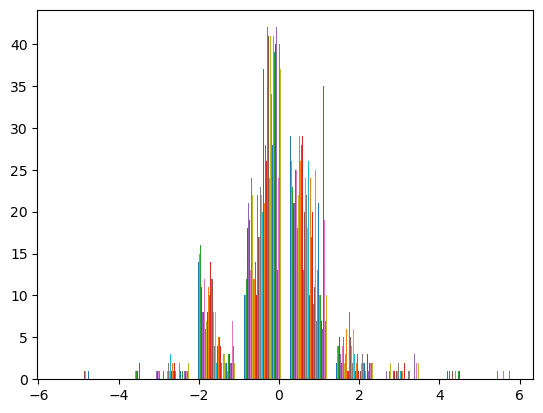

In [106]:
df_tp=df_x.copy()
df_xsd=(df_tp-df_tp.mean(axis=0))/df_tp.std(axis=0)
df_xsd

plt.hist(df_xsd)
plt.show()

In [108]:
df_tp=df_xsd.copy()
R = np.corrcoef(df_tp.T)
_R =R-np.identity(len(R[0]))
index =np.where(_R == _R.max())
print(_R[index[0][0], index[0][1]])
print(R)

0.9789562549617961
[[ 1.          0.97895625  0.92427003 ...  0.23898062  0.13386029
  -0.35025934]
 [ 0.97895625  1.          0.95102034 ...  0.24820144  0.06555317
  -0.32842143]
 [ 0.92427003  0.95102034  1.         ...  0.14521903 -0.00270981
  -0.27718549]
 ...
 [ 0.23898062  0.24820144  0.14521903 ...  1.         -0.30451892
  -0.13273658]
 [ 0.13386029  0.06555317 -0.00270981 ... -0.30451892  1.
  -0.59915684]
 [-0.35025934 -0.32842143 -0.27718549 ... -0.13273658 -0.59915684
   1.        ]]


1.0911634942265351
1.3076138300161457
1.4415928906324982
1.7849132980751925
1.9585796622751732
2.385457723981865
2.596389107299433
3.224731160372105
3.2981652127664223
3.7845523734825783
5.005719979806732
6.507858830278815


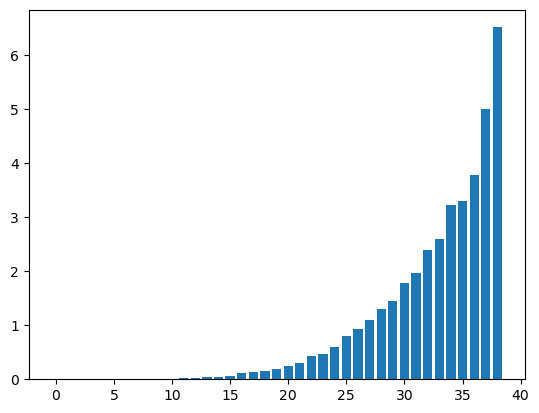

In [109]:
eigvals, eigvecs =np.linalg.eigh(R)
plt.bar(range(39), eigvals)
for eigv in eigvals:
    if eigv>1:
        print(eigv)


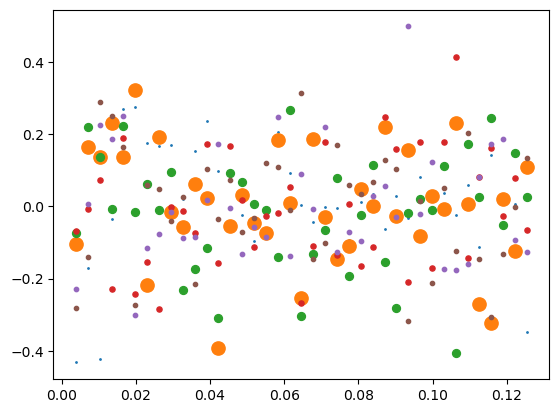

In [113]:
for i in range(6):
    plt.scatter(df_tpt[1:],eigvecs[-i],s=2**eigvals[-i])
plt.show()


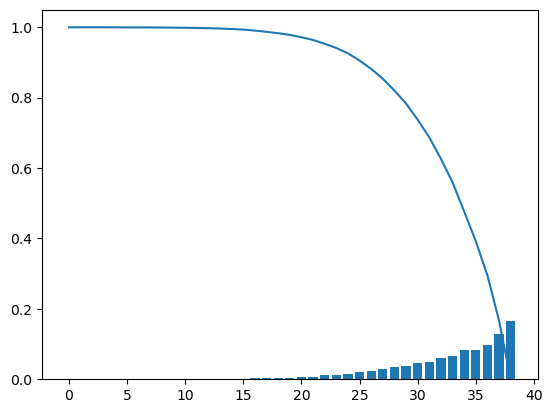

In [114]:
sum_lamda=np.sum(eigvals)
F=np.divide(eigvals,sum_lamda)
plt.bar(range(39), F)
sum_tp=0
list_tp=pd.DataFrame(range(39))
for i in range(39):
    sum_tp+=F[i]
    list_tp[i]=1-sum_tp
plt.plot(range(39),list_tp.loc[0])


In [137]:

pca=PCA(n_components=4)
df_pca=pca.fit_transform(df_xsd)
df_pca=pd.DataFrame(df_pca)

In [116]:
Mks=['o','*','+','x','d','|','_',
        'v','^','<','>',
        '1','2','3','4','8',
        's','p','h','H']
Blues=['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b']
Greens=['#f7fcf5','#e5f5e0','#c7e9c0','#a1d99b','#74c476','#41ab5d','#238b45','#006d2c','#00441b']
Greys=['#ffffff','#f0f0f0','#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525','#000000']
Oranges=['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']
Purples=['#fcfbfd','#efedf5','#dadaeb','#bcbddc','#9e9ac8','#807dba','#6a51a3','#54278f','#3f007d']
Reds=['#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#a50f15','#67000d']
#复色序列
BuGn=['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
BuPu=['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
GnBu=['#f7fcf0','#e0f3db','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081']
OrRd=['#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
PuRd=['#f7f4f9','#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#980043','#67001f']
Colors=[Blues,Greens,Greys,Oranges,Purples,Reds,BuGn,BuPu,GnBu,OrRd,PuRd]
temp=['#a50026','#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695']

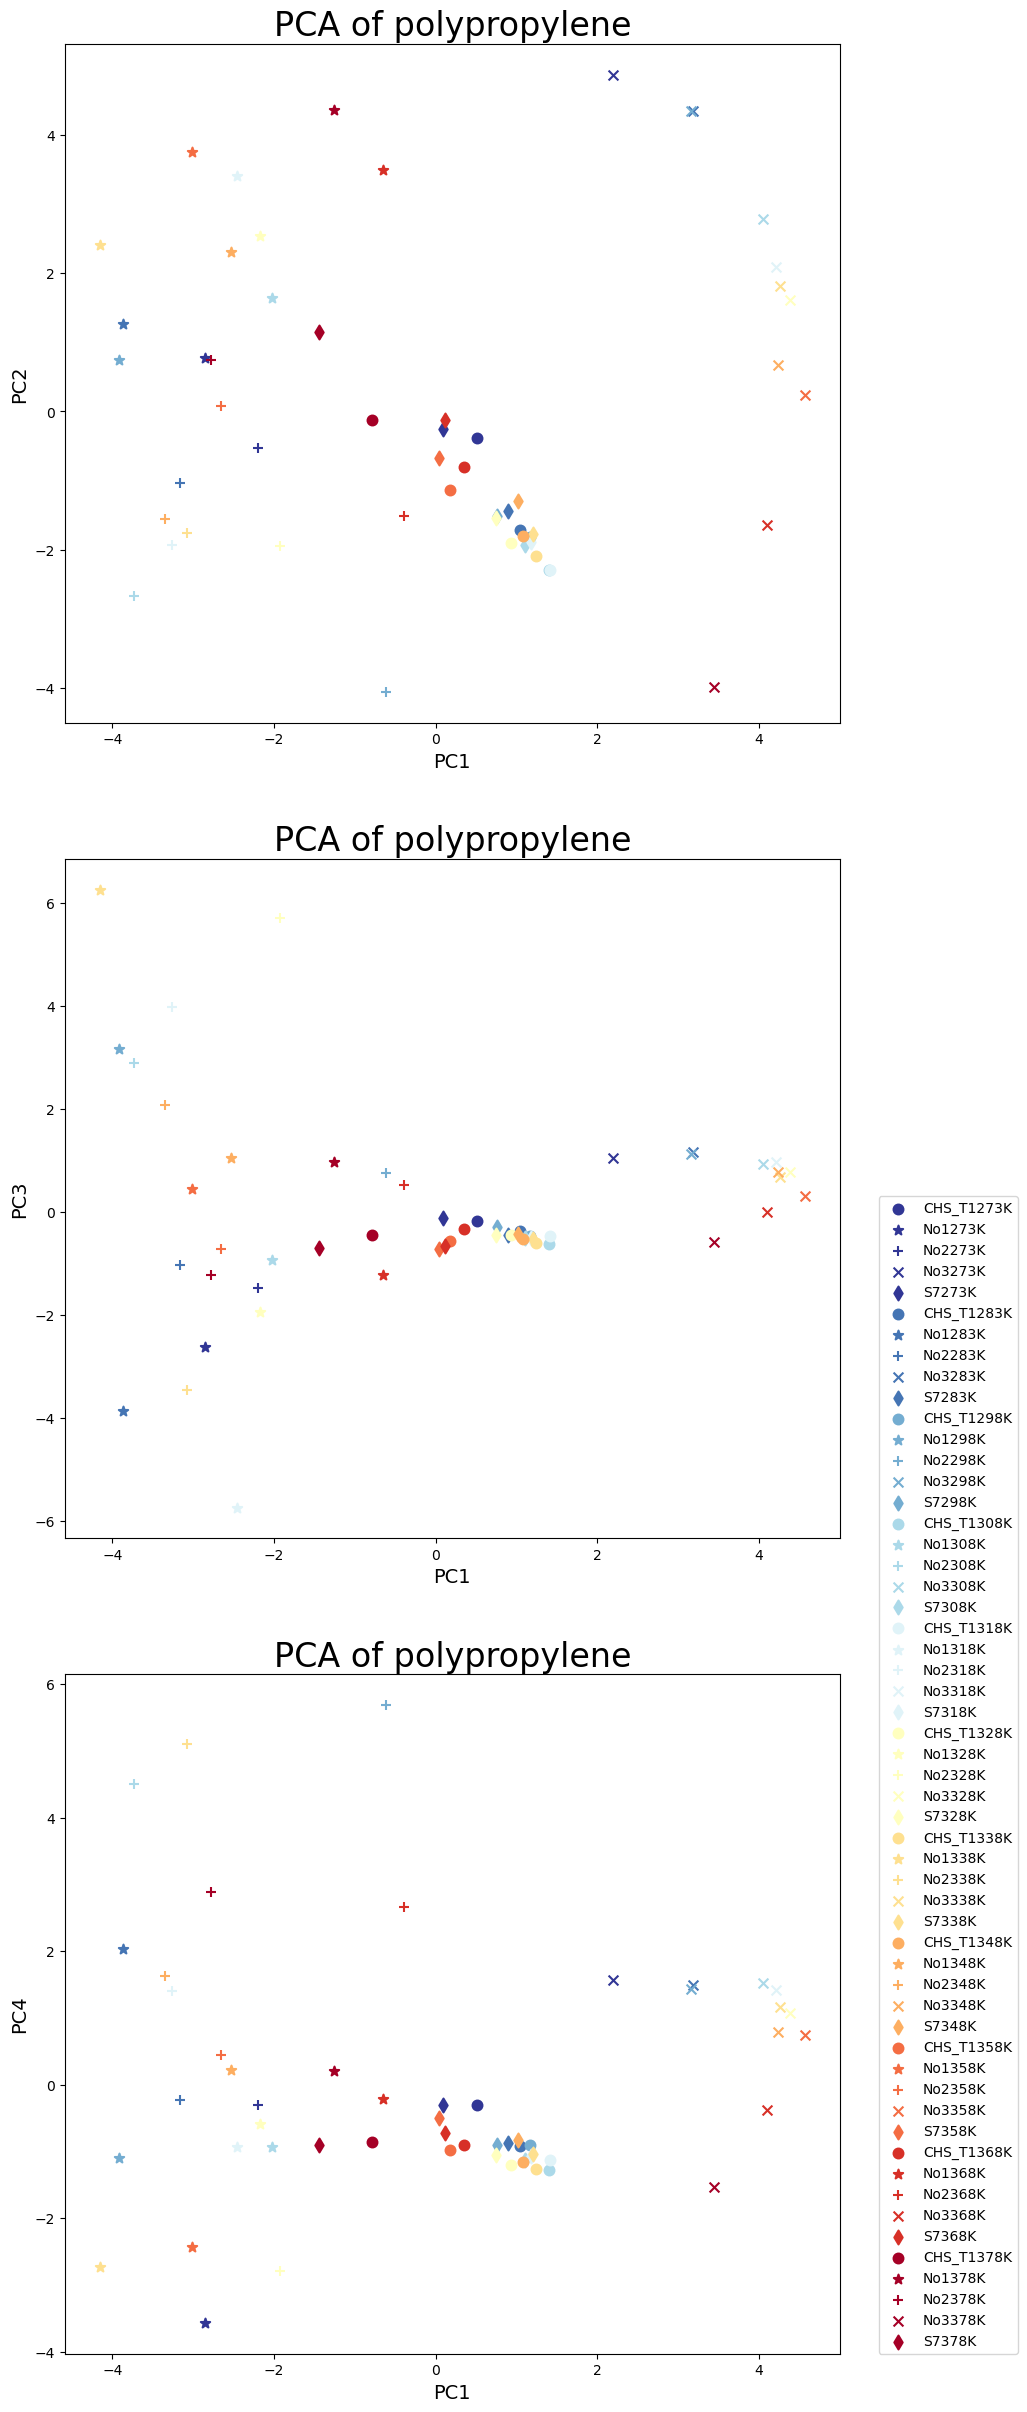

In [149]:

fig, (ax1,ax2,ax3)= plt.subplots(nrows=3,ncols=1,figsize=(10,30))
ax=[ax1,ax2,ax3]


for i in df_pca[0].index:
      for j in range(4):  
        if j>0:
                ax[j-1].set_xlabel('PC1',fontsize=14)
                ax[j-1].set_ylabel(fr'PC{j+1}',fontsize=14)
                ax[j-1].set_title('PCA of polypropylene',fontsize=24)
                df_tp1=df_tps.iloc[i,0]
                df_tp2=df_tps.iloc[i,1]
                if df_tp1=='CHS_T1':
                        MK=Mks[0]
                elif df_tp1=='No1':
                        MK=Mks[1]
                elif df_tp1=='No2':
                        MK=Mks[2]
                elif df_tp1=='No3':
                        MK=Mks[3]
                elif df_tp1=='S7':
                        MK=Mks[4]
                if df_tp2=='273K':
                        Cl=temp[10]
                elif df_tp2=='283K':
                        Cl=temp[9]
                elif df_tp2=='298K':
                        Cl=temp[8]
                elif df_tp2=='308K':
                        Cl=temp[7]
                elif df_tp2=='318K':
                        Cl=temp[6]
                elif df_tp2=='328K':
                        Cl=temp[5]
                elif df_tp2=='338K':
                        Cl=temp[4]
                elif df_tp2=='348K':
                        Cl=temp[3]
                elif df_tp2=='358K':
                        Cl=temp[2]
                elif df_tp2=='368K':
                        Cl=temp[1]
                elif df_tp2=='378K':
                        Cl=temp[0]
                ax[j-1].scatter(df_pca.iloc[i,0],df_pca.iloc[i,j],
                                marker=MK,s=50,c=Cl,linewidths=1.5,
                                label=str(df_tp1+df_tp2))
ax3.legend(bbox_to_anchor=(1.05,0),loc=3,borderaxespad=0)
            
plt.show(ax)

In [150]:
mainPath = r'C:\outerzone\MySourceCode\VsCworks\testData\20240524'
fileList=os.listdir(mainPath)
showDir(fileList)
str_tp = ''
path_tp= ''

0 .csv
1 GP-mse_loglog.png
2 GP-mse_withoutLegend.png
3 GP-mse_ylog-diff-withoutLegend.png
4 GP-mse_ylog-diff.png
5 GP-mse_ylog.png
6 GP_273K-mse.png
7 GP_273K-mse_log.png
8 GP_273K-mse_pc1.png
9 GP_273K-mse_processed-by5.png
10 GP_273K-mse_processed.png
11 mes-PP-diff1.png
12 mes-PP-origin.png
13 MSE-GP-20240527.csv
14 mse-GP-PCA-result-bydiff.png
15 mse-GP-PCA-result.png
16 MSE-GP-processed-20240527.csv
17 mse-GP-rutern-20240527-.csv
18 mse-GP-rutern-20240527.csv
19 mse-GP-rutern-sample.csv
20 mse-GP-SD-20240527.csv
21 mse-GP-timeline-20240527.csv
22 mse-GP.csv
23 mse-PP-PC.png
24 mse-PP-PCA.png
25 mse-PP-processed-20240527.csv
26 mse-PP-processed.csv
27 mse-PP-sample.csv
28 mse-PP-SD-20240527.csv
29 mse-PP-take.png
30 mse-PP-ylog.png
31 mse-PP.csv
32 RFR.png
33 sample-mse-GP.csv
34 sample-mse-PP.csv


In [151]:
path_tp= os.path.join(mainPath,'mse-GP-SD-20240527.csv')
df_tp=pd.read_csv(path_tp,index_col=0)
df_tpsd=df_tp
df_tpsd


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.829077,0.692707,0.576055,0.499197,0.444256,0.402470,0.373594,0.353587,0.339830,...,0.231655,0.227867,0.224529,0.221005,0.217909,0.216480,0.215228,0.211955,0.207798,0.204973
1,1.0,0.651454,0.441169,0.327575,0.252958,0.210888,0.190320,0.172509,0.161819,0.174203,...,0.135073,0.132381,0.138510,0.135452,0.196931,0.137549,0.119613,0.132211,0.123202,0.124724
2,1.0,0.591877,0.397191,0.303914,0.253571,0.224109,0.200766,0.188067,0.183618,0.192087,...,0.155109,0.154992,0.145567,0.141666,0.149221,0.138281,0.150147,0.144404,0.130589,0.137113
3,1.0,0.862599,0.728231,0.610449,0.519773,0.443741,0.382433,0.331533,0.289560,0.257805,...,0.105292,0.106803,0.099437,0.098141,0.100752,0.099455,0.099196,0.093262,0.092427,0.087227
4,1.0,0.799255,0.653469,0.542848,0.462921,0.398187,0.358331,0.334367,0.317584,0.305238,...,0.209188,0.206422,0.200941,0.199011,0.197502,0.195722,0.193185,0.190721,0.188640,0.185828
5,1.0,0.872363,0.754439,0.660177,0.586021,0.529763,0.497174,0.469970,0.451944,0.441428,...,0.340491,0.336033,0.331750,0.327952,0.325693,0.321914,0.319912,0.317749,0.314355,0.311903
6,1.0,0.671003,0.475183,0.354226,0.272493,0.230807,0.207193,0.180795,0.166595,0.169701,...,0.133466,0.140441,0.145312,0.120601,0.125750,0.197693,0.118433,0.126941,0.106026,0.142279
7,1.0,0.602057,0.390219,0.297825,0.238645,0.203139,0.184760,0.173756,0.175714,0.170414,...,0.146255,0.125556,0.139290,0.141793,0.145019,0.143110,0.146078,0.124783,0.135601,0.137652
8,1.0,0.888053,0.777161,0.675249,0.585078,0.504651,0.441285,0.389919,0.344390,0.309813,...,0.111723,0.111536,0.108298,0.109472,0.107262,0.102522,0.104715,0.102471,0.100347,0.097591
9,1.0,0.855076,0.734440,0.636610,0.562074,0.510505,0.471210,0.441516,0.421934,0.406198,...,0.319225,0.316191,0.316067,0.312753,0.307263,0.304681,0.303489,0.302225,0.298629,0.293621


In [152]:

df_tpt.size

40

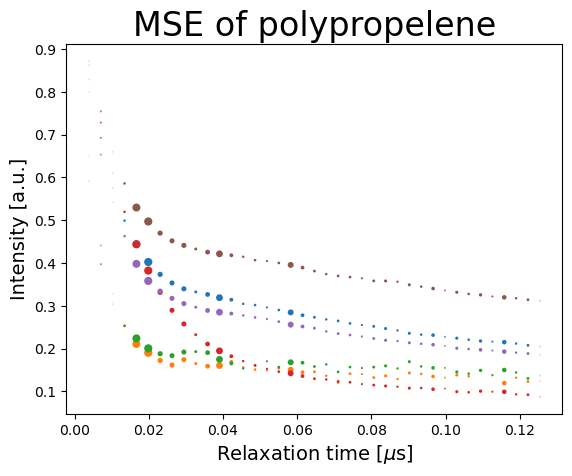

In [155]:

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_xlabel('Relaxation time [$\\mu$s]',fontsize=14)
ax.set_ylabel('Intensity [a.u.]',fontsize=14)
ax.set_title('MSE of polypropelene',fontsize=24)


#ax.set_yscale('log',base=10)
for i in range(6):
    ax.scatter(df_tpt[1:],df_tpsd.iloc[i,1:].T,
               label=df_tps.iloc[:5,0],s=100000**eigvecs[0])

plt.show(ax)

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [159]:
X=pd.DataFrame()
X=df_pca
y=df_tps.copy()
for i in y.index:
    if y.iloc[i,0]=='CHS_T1' or y.iloc[i,0]=='S7':
        y.iloc[i,1]=1
    else : y.iloc[i,1]=0
y=y.iloc[:,1].tolist()
y

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1]

In [161]:


train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.3, random_state=0)

# 正解率を格納する空リストを作成


model = RandomForestClassifier(random_state=0) 
model.fit(train_X, train_y)
accuracy=model.score(test_X, test_y)
accuracy

1.0

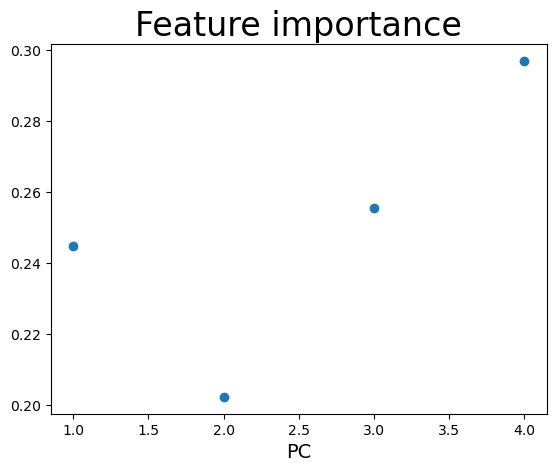

In [162]:
fimp=model.feature_importances_
plt.title('Feature importance',fontsize=24)
plt.xlabel('PC',fontsize=14)
plt.scatter(range(1,5),fimp)